In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
plt.style.use('seaborn')

In [37]:
# tabl_lex_alcaldes=pd.read_csv("tabl_lex_alcaldes.csv", encoding="latin1", index_col=0)

In [38]:
# tabl_lex_alcaldes=pd.read_csv("tabl_lex_alcaldes_categorias.csv", encoding="latin1", index_col=0)
# tabl_lex_alcaldes=tabl_lex_alcaldes.groupby('Category').sum()
tabl_lex_alcaldes=pd.read_csv("lex_cont_tbl_output_R.csv", encoding="UTF8", index_col=0)

In [40]:
edges_alcaldes=tabl_lex_alcaldes.stack().reset_index()  
edges_alcaldes.columns=["tw_para","tw_de","freq"]
edges_alcaldes=edges_alcaldes[["tw_de","tw_para","freq"]]

In [41]:
mx_fr=max(edges_alcaldes.freq)

In [42]:
coord_nodes=pd.read_csv("nodes_coords.csv", index_col=0)
coord_nodes

,x_pos,y_pos,z_pos
Antes,0.238799,0.024720,-0.036759
Después,-0.149517,-0.015478,0.023015
Arauca,0.173277,0.176924,-0.067717
Barranquilla,-0.081761,0.210940,-0.031447
Bogotá,-0.000205,-0.172149,0.037712
Bucaramanga,-0.067843,-0.167498,-0.066431
Cali,-0.111480,0.047954,-0.188417
Cúcuta,0.109594,0.107072,-0.161397
Ibagué,-0.057526,-0.001243,-0.076497
Medellín,-0.070071,-0.022948,-0.083597


In [43]:
g = nx.Graph()

In [44]:
for i, elrow in edges_alcaldes.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [45]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))


# of edges: 234
# of nodes: 35


In [46]:
for n_pos, n_node in coord_nodes.iterrows():
#     print(n_pos,n_node[0],n_node[1])
    g.add_node(n_pos,pos=(n_node[0],n_node[1]))

# g.add_node("Santa Marta",pos=(0,0))#Tunja queda en el centro forzado porque no tenía valores de frecuencias en la tabla de contingencia léxica

In [47]:
mca_pos=nx.get_node_attributes(g,'pos')

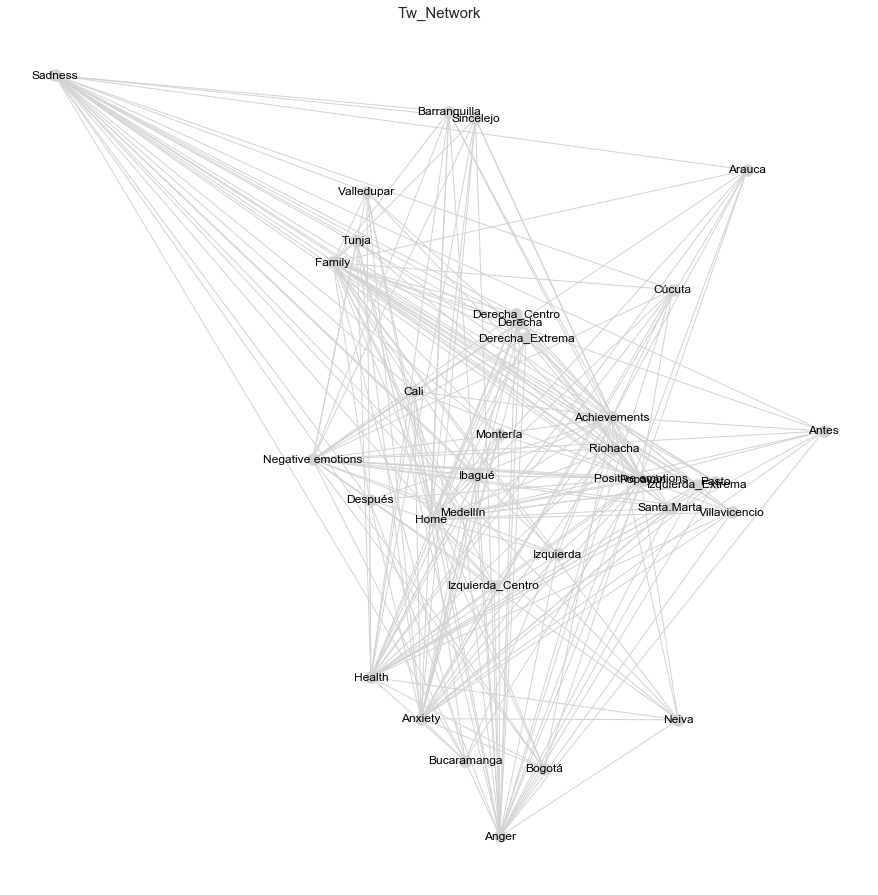

In [49]:
plt.figure(figsize=(12, 12))
nx.draw(g,
        node_size=150,
        edge_color='lightgray',
        node_color='lightgray',
        with_labels=True, 
        pos=mca_pos)
plt.title('Tw_Network', size=15)
plt.show()

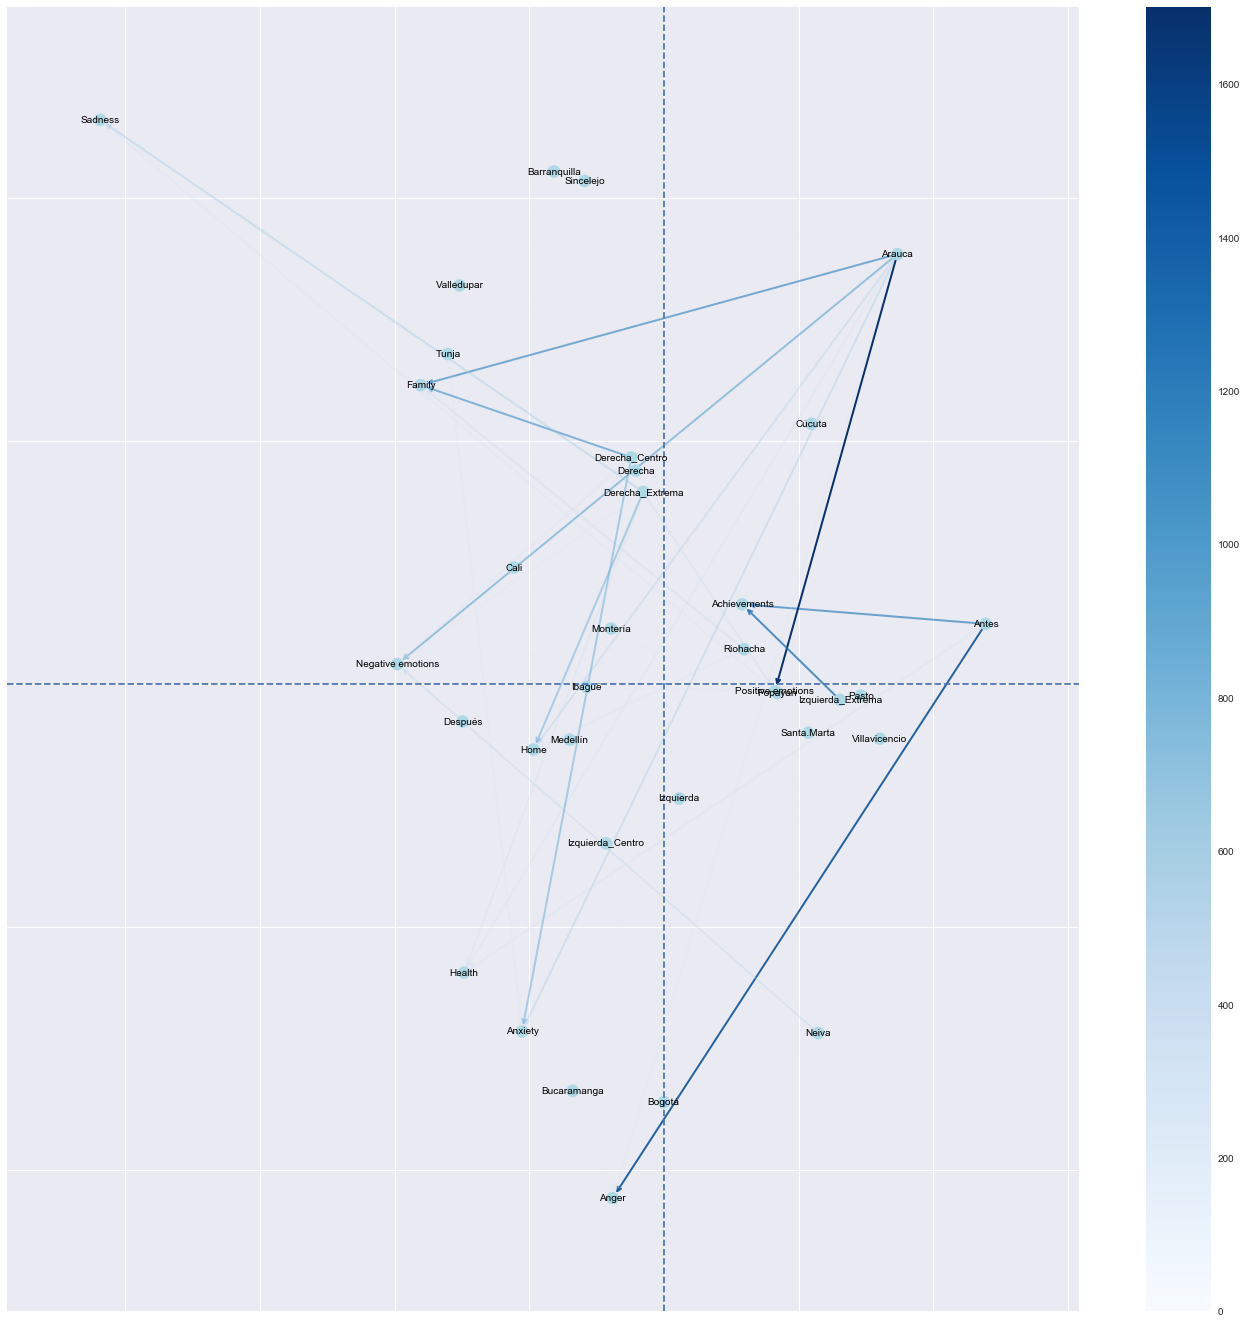

In [51]:
mx_fr=max(edges_alcaldes.freq)


G= nx.DiGraph()#nx.generators.directed.random_k_out_graph(10, 3, 0.5)
for i, elrow in edges_alcaldes.iterrows():
    G.add_edge(elrow[0], elrow[1])

pos = mca_pos#nx.layout.spring_layout(G)

node_sizes = [150 for i in range(len(G))]
M = G.number_of_edges()
edge_colors =[fr for fr in edges_alcaldes.freq]#range(2, M + 2)
edge_alphas =[fr/mx_fr for fr in edges_alcaldes.freq]#[fr/mx_fr for fr in graph_df_filt.freq]#[(5 + i) / (M + 4) for i in range(M)]

# plt.figure(figsize=(12, 12))
plt.figure(figsize=(24, 24))

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

nx.draw_networkx_labels(G, pos, font_size=10)

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.scatter(coord_nodes.x_pos, coord_nodes.y_pos, alpha=0)
ax = plt.gca()
ax.axvline(ls="--")
ax.axhline(ls="--")

plt.grid(True)
# ax.set_axis_off()
plt.show()